<a href="https://colab.research.google.com/github/devpatel25/ML_Algorithms/blob/main/Big_Sales_Prediction_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd


In [49]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Big%20Sales%20Data.csv')

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [52]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [53]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,8485
Regular,4824
LF,522
reg,195
low fat,178


In [54]:
df.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [55]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,9185
Regular,5019


In [56]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [58]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,9185
Regular,5019


In [59]:
df.replace({'Low Fat' : 0, 'Regular': 1}, inplace=True)

In [60]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
0,9185
1,5019


In [61]:
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,2013
Snack Foods,1989
Household,1548
Frozen Foods,1426
Dairy,1136
Baking Goods,1086
Canned,1084
Health and Hygiene,858
Meat,736


In [62]:
df.replace({'Fruits and Vegetables': 0,'Snack Foods': 0,'Frozen Foods': 0,'Dairy': 0,'Baking Goods': 0,'Canned': 0,'Meat': 0,'Soft Drinks': 0,'Breads': 0,'Hard Drinks': 0, 'Starchy Foods': 0,'Breakfast': 0,'Seafood' : 0, 'Household' : 1, 'Health and Hygiene' : 2, 'Others' : 3}, inplace= True)

In [63]:
df['Item_Type'].value_counts()


,count
Item_Type,
0,11518
1,1548
2,858
3,280


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.3+ MB


In [65]:
# Convert 'Outlet_Identifier' column to a consistent type (string in this case) before sorting
df['Outlet_Identifier'] = df['Outlet_Identifier'].astype(str)
df['Outlet_Identifier'].values.sort()
df['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,1559
OUT013,1553
OUT035,1550
OUT046,1550
OUT049,1550
OUT045,1548
OUT018,1546
OUT017,1543
OUT010,925


In [66]:
df.replace({'OUT049': 0,'OUT018': 1,'OUT017': 2,'OUT019': 3,'OUT010': 4, 'OUT013': 5, 'OUT027': 6, 'OUT035': 7, 'OUT045': 8,'OUT046' : 9}, inplace= True)

In [67]:
df['Outlet_Identifier'].value_counts()


,count
Outlet_Identifier,
6,1559
5,1553
7,1550
9,1550
0,1550
8,1548
1,1546
2,1543
4,925


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.3+ MB


In [69]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,7122
Small,5529
High,1553


In [70]:
df.replace({'Small': 0, 'Medium': 1, 'High': 2}, inplace=True)

In [71]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,5583
Tier 2,4641
Tier 1,3980


In [72]:
df.replace({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}, inplace=True)

In [73]:
df['Item_Outlet_Sales'].value_counts()

,count
Item_Outlet_Sales,
958.752000,17
1342.252800,16
703.084800,15
1845.597600,15
1278.336000,14
...,...
2979.927510,1
4149.931400,1
4113.790835,1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 1.3+ MB


In [75]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,9294
Grocery Store,1805
Supermarket Type3,1559
Supermarket Type2,1546


In [76]:
df.replace({'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 1,'Supermarket Type3': 1},inplace=True)

In [77]:
df['Outlet_Type'].value_counts()

,count
Outlet_Type,
1,12399
0,1805


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [79]:
y=df['Item_Outlet_Sales']
x=df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [80]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  int64  
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  int64  
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  int64  
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  int64  
 8   Outlet_Location_Type       14204 non-null  int64  
 9   Outlet_Type                14204 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.1 MB


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc=StandardScaler()

In [83]:
x_sc=df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [84]:
x_sc=sc.fit_transform(x_sc)

In [85]:
x[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]= pd.DataFrame(x_sc,columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

In [86]:
  x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.150548e-01,0,0.884136,0,-1.731787,4,0.139681,1,0,1
1,-1.150548e-01,0,0.893006,0,-1.723734,4,1.095319,1,1,1
2,-1.150548e-01,0,0.889583,0,-1.723734,4,1.334228,1,2,1
3,-1.150548e-01,0,-1.281712,0,-1.717291,4,-1.532686,0,0,0
4,-7.040459e-01,1,-0.397031,0,-1.706016,4,1.095319,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,2.743407e-03,0,0.070990,0,1.947664,0,0.736955,0,1,1
14200,2.743407e-03,0,0.078898,0,1.962160,0,1.095319,1,1,1
14201,2.743407e-03,0,0.070120,0,1.965381,0,-1.293777,2,2,1
14202,-8.370067e-16,0,0.064694,0,1.973435,0,-1.532686,1,2,1


In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2529)

In [88]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((1421, 10), (12783, 10), (1421,), (12783,))

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
model=RandomForestRegressor()

In [92]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [93]:
y_pred=model.predict(x_test)

In [95]:
y_pred

array([1350.01250571,  838.57482274, 1910.79180808, ..., 2277.69098765,
       3325.87849443,  431.72473171])

In [96]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [97]:
mean_squared_error(y_test,y_pred)

1666010.5949976295

In [98]:
mean_absolute_error(y_test,y_pred)

824.6461975973561

In [99]:
r2_score(y_test,y_pred)

0.5663621777953942

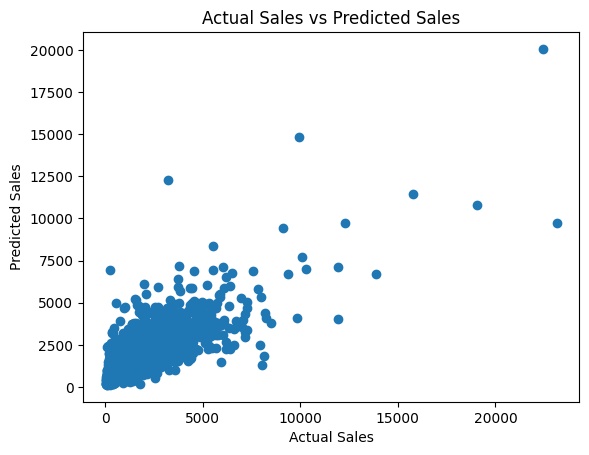

In [102]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()